In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community.centrality import girvan_newman
from networkx.algorithms.community import k_clique_communities
import networkx.algorithms.community as nx_comm
from sklearn.cluster import SpectralClustering
from sklearn import metrics
import itertools
import numpy as np
import infomap
from infomap import Infomap
from sklearn.metrics.cluster import normalized_mutual_info_score
from tqdm import tqdm
import pickle
from utils import *

In [2]:
# change mu and plot for each mu Normalised mutual information 
# change mu and plot for each mu Q (modularity)
tau1 = 2.5 # Power law exponent for the degree distribution of the created graph. 
tau2 = 1.5 # Power law exponent for the community size distribution in the created graph.
# Define loop for runs
n_list = [500,1000,10000] # sizes of graphs to compare.

n = n_list[2]
NMI_list = []
Q_list = []
for mu in tqdm(range(1,10)):
    G = nx.LFR_benchmark_graph(n, tau1, tau2, mu/10, min_degree = 20, max_degree=50, seed=10) 
    ground_truth_communities = list({frozenset(G.nodes[v]["community"]) for v in G})
    # presentCommunities(G,ground_truth_communities)
    # Use modularity to check partition
    ground_truth_mod = nx_comm.modularity(G,ground_truth_communities)
    print(f"The ground truth modularity is {ground_truth_mod:.3}")
    print(f"{len(ground_truth_communities)} communities detected")
    k = len(ground_truth_communities) # number of ground truth communities.

    ground_truth_communites_vector = NMI_reshape(ground_truth_communities,n)
    # Methods of community detection

    # ------- Givarn Newman -------
    print("Girvan Newman")
    communities = CommunityDetectionAlgorithms.girvan_newman_calc(G,k)
    communities_vector = NMI_reshape(communities,n)
    gn_NMI = normalized_mutual_info_score(ground_truth_communites_vector,communities_vector)
    gn_Q = nx_comm.modularity(G,communities)

    # ------- Infomap -------
    print("Infomap")
    communities = CommunityDetectionAlgorithms.infomap_calc(G)
    communities_vector = NMI_reshape(communities,n)
    im_NMI = normalized_mutual_info_score(ground_truth_communites_vector,communities_vector)
    im_Q = nx_comm.modularity(G,communities)

    # ------- Spcetral Clustering -------
    print("Spectral clustering")
    communities = CommunityDetectionAlgorithms.spectral_cluster_calc(G,k)
    communities_vector = NMI_reshape(communities,n)
    sc_NMI = normalized_mutual_info_score(ground_truth_communites_vector,communities_vector)
    sc_Q = nx_comm.modularity(G,communities)

    NMI_list.append([gn_NMI,im_NMI,sc_NMI])
    Q_list.append([gn_Q,im_Q,sc_Q])

data_store = [NMI_list,Q_list]

# Save data to pickle object for later visualisation
fileObj = open('n1000.pkl', 'wb')
pickle.dump(data_store,fileObj)
fileObj.close() 

  0%|          | 0/9 [00:00<?, ?it/s]

The ground truth modularity is 0.83
318 communities detected
Girvan Newman


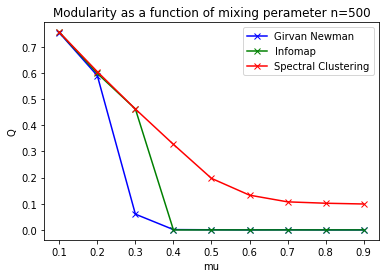

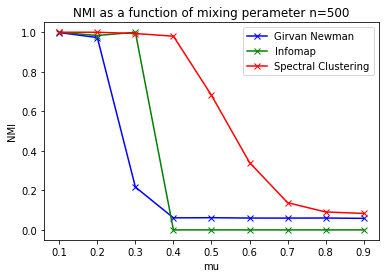

In [9]:
# Visualisation of reasults
with open('n500.pkl', 'rb') as f:
    data = pickle.load(f)

[NMI_list,Q_list] = data
NMI_list = np.array(NMI_list)
Q_list = np.array(Q_list)

GN_Q = Q_list[:,0]
IM_Q = Q_list[:,1]
SC_Q = Q_list[:,2]

GN_NMI = NMI_list[:,0]
IM_NMI = NMI_list[:,1]
SC_NMI = NMI_list[:,2]

fig1 = plt.figure(facecolor=(1, 1, 1))
x = np.linspace(0.1,0.9,9)
plt.plot(x,GN_Q,'xb-')
plt.plot(x,IM_Q,'xg-')
plt.plot(x,SC_Q,'xr-')
plt.xlabel("mu")
plt.ylabel("Q")
plt.title("Modularity as a function of mixing perameter n=500")
plt.legend(['Girvan Newman','Infomap','Spectral Clustering'])
plt.show()
fig1.savefig('../figures/n500Q')

fig2 = plt.figure(facecolor=(1, 1, 1))
plt.plot(x,GN_NMI,'xb-')
plt.plot(x,IM_NMI,'xg-')
plt.plot(x,SC_NMI,'xr-')
plt.xlabel("mu")
plt.ylabel("NMI")
plt.title("NMI as a function of mixing perameter n=500")
plt.legend(['Girvan Newman','Infomap','Spectral Clustering'])

plt.show()
fig2.savefig('../figures/n500NMI')